In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.cluster.hierarchy import dendrogram, ward, average, complete, single

import xgboost as xgb

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

pd.options.display.max_columns = 100

In [2]:
hod = pd.read_csv("Hour of Day1 October 2020 - 26 January 2021.csv", sep=';')
hod

,Campaign,Hour of day,Campaign type,Campaign subtype,Device,Currency,Impr. (Top) %,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,View-through Conv.,Cost / conv.,Conv. rate
0,rumahSubsidi // griyaBukitIntan,1,Search,All features,Desktop,IDR,0.00%,0,37,0.00%,00.00,00.00,00.00,0,00.00,0.00%
1,rumahSubsidi // griyaBukitIntan,16,Search,All features,Mobile,IDR,100.00%,29,"2,831",1.02%,"1,073.89","31,142.69",02.00,0,"15,571.35",6.90%
2,rumahSubsidi // griyaBukitIntan,20,Search,All features,Desktop,IDR,0.00%,0,217,0.00%,00.00,00.00,00.00,0,00.00,0.00%
3,rumahSubsidi // griyaBukitIntan,15,Search,All features,Desktop,IDR,60.00%,0,534,0.00%,00.00,00.00,00.00,0,00.00,0.00%
4,rumahSubsidi // griyaBukitIntan,8,Search,All features,Mobile,IDR,100.00%,9,"1,473",0.61%,"1,016.65","9,149.82",00.00,0,00.00,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,CPA Leads Experiment,19,Search,All features,Tablet,IDR,0.00%,0,20,0.00%,00.00,00.00,00.00,0,00.00,0.00%
271,CPA Leads Experiment,15,Search,All features,Desktop,IDR,50.00%,4,390,1.03%,"1,578.96","6,315.84",00.00,0,00.00,0.00%
272,CPA Leads Experiment,5,Search,All features,Desktop,IDR,100.00%,0,17,0.00%,00.00,00.00,00.00,0,00.00,0.00%
273,Promo // Griya Bukit Intan // 4 Juta,15,Search,All features,Desktop,IDR,100.00%,3,11,27.27%,"4,020.00","12,060.00",00.00,0,00.00,0.00%


In [3]:
hod.columns

Index(['Campaign', 'Hour of day', 'Campaign type', 'Campaign subtype',
       'Device', 'Currency', 'Impr. (Top) %', 'Clicks', 'Impressions', 'CTR',
       'Avg. CPC', 'Cost', 'Conversions', 'View-through Conv.', 'Cost / conv.',
       'Conv. rate'],
      dtype='object')

In [69]:
hod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign          275 non-null    object 
 1   hourofday         275 non-null    int64  
 2   campaigntype      275 non-null    object 
 3   campaignsubtype   275 non-null    object 
 4   device            275 non-null    object 
 5   currency          275 non-null    object 
 6   impr(top)%        275 non-null    float64
 7   clicks            275 non-null    int64  
 8   impressions       275 non-null    int64  
 9   ctr               275 non-null    float64
 10  avgcpc            275 non-null    object 
 11  cost              275 non-null    object 
 12  conversions       275 non-null    float64
 13  view-throughconv  275 non-null    int64  
 14  cost/conv         275 non-null    float64
 15  convrate          275 non-null    float64
dtypes: float64(5), int64(4), object(7)
memory us

In [6]:
hod.columns = hod.columns.str.lower().str.replace(' ','').str.replace('.','')
hod.columns

Index(['campaign', 'hourofday', 'campaigntype', 'campaignsubtype', 'device',
       'currency', 'impr(top)%', 'clicks', 'impressions', 'ctr', 'avgcpc',
       'cost', 'conversions', 'view-throughconv', 'cost/conv', 'convrate'],
      dtype='object')

'campaign', -- OK
'hourofday',  -- OK
'campaigntype',  -- OK
'campaignsubtype',  -- OK
'device',  -- OK
'currency',  -- OK
'impr(top)%', -- OK, the location of your ads on the Search engine result
'clicks',  -- OK
'impressions',  -- OK, banyaknya yang liat
'ctr', -- OK, click through rate
'avgcpc',  -- OK, average cost per click
'cost',  -- OK 
'conversions', -- OK 
'view-throughconv', 
'cost/conv', 
'convrate

__Search top impression rate__<br>
Search top impression rate “Impr. (Top) %” is the percent of your ad impressions that are shown anywhere above the organic search results.
Search top impression rate = Impressions on top/Impressions

__CTR__<br>
You can use these metrics to understand changes in click-through rate (CTR) caused by a change in the location of your ads on the search result page. We don’t recommend you use these metrics as a target to set your bids because, sometimes, they may decrease as bids increase. This happens as higher bids may allow you to enter more competitive auctions in a worse location.

__view-throughconv__<br>
The period of time after an impression during which a view-through conversion will be recorded. View-through conversions occur after an ad impression, if the user doesn’t interact with the ad, then later converts.

You can set your view-through conversion window when you create or edit conversion actions. For example, if you pick 30 days for a conversion action, then view-through conversions that happen within 30 days after an impression are tracked. A longer view-through conversion window will usually increase the number of view-through conversions Google Ads records.

__cost/conv__
Cost per conversion 

In [70]:
hod.describe()

,hourofday,impr(top)%,clicks,impressions,ctr,conversions,view-throughconv,cost/conv,convrate
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.0,275.000000,275.000000
mean,11.527273,40.073891,3.156364,231.178182,3.180255,0.200030,0.0,2696.115382,1.703345
std,6.986051,45.364112,6.486448,652.529425,8.783731,0.626656,0.0,9735.574794,5.573938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,12.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,18.000000,92.705000,3.000000,134.500000,1.190000,0.000000,0.0,0.000000,0.000000
max,23.000000,100.000000,29.000000,4369.000000,100.000000,4.000000,0.0,67990.000000,40.000000


In [68]:
hod.describe(include='object')

,campaign,campaigntype,campaignsubtype,device,currency,avgcpc,cost
count,275,275,275,275,275,275,275
unique,4,1,1,3,1,107,107
top,rumahSubsidi // griyaBukitIntan,Search,All features,Mobile,IDR,00.00,00.00
freq,72,275,275,96,275,168,168


In [66]:
hod['impressions'] = hod.impressions.str.replace(',','').astype('int')
hod['conversions'] = hod.conversions.str.replace(',','.').astype('float')
hod['cost/conv'] = hod['cost/conv'].str.replace(',','').astype('float')
hod['convrate'] = hod.convrate.str.replace('%','').astype('float')
hod['ctr'] = hod.ctr.str.replace('%','').astype('float')
hod['impr(top)%'] = hod['impr(top)%'].str.replace('%','').astype('float')

In [83]:
import numpy as np

cost_arr = list(hod['cost'].unique())
avgcpc_arr = list(hod['avgcpc'].unique())
np.sort(cost_arr)

array(['00.00', '10271.00', '10384.00', '10433.19', '10609.57', '1165.30',
       '11723.59', '1178.72', '12060.00', '1276.00', '1298.00', '1353.10',
       '1580.05', '15828.00', '15884.00', '16580.91', '1659.00',
       '16740.00', '17448.65', '1787.00', '17882.25', '1797.00',
       '18867.78', '1911.00', '1925.00', '1930.00', '1956.31', '1991.00',
       '2000.00', '2008.48', '20271.44', '20602.91', '20795.91',
       '20864.17', '21001.88', '21191.26', '21913.00', '22345.69',
       '2250.00', '23849.00', '2441.53', '25282.00', '2545.87',
       '25528.00', '26125.16', '2619.41', '26581.00', '2690.03',
       '27111.00', '27461.00', '2803.46', '28910.00', '2929.92',
       '2979.00', '31142.69', '3244.12', '33871.00', '3426.00',
       '34279.00', '3450.00', '3691.00', '3725.00', '3733.11', '39246.00',
       '4010.29', '4017.69', '40709.00', '4186.00', '43088.00', '4386.00',
       '4514.38', '4674.00', '468.86', '48854.00', '5049.00', '5084.19',
       '5116.89', '5179.00', '543

In [88]:
more_than_9 = [i for i in hod['cost'] if len(i)>8 ]
len(more_than_9)

4

In [87]:
more_than_9avg = [i for i in hod['avgcpc'] if len(i)>8 ]
len(more_than_9avg)

20

In [111]:
hod.describe(include='object')

,campaign,campaigntype,campaignsubtype,device,currency,avgcpc,cost
count,255,255,255,255,255,255,255
unique,4,1,1,3,1,87,87
top,Campaign #1,Search,All features,Desktop,IDR,00.00,00.00
freq,71,255,255,87,255,168,168


In [91]:
hod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign          275 non-null    object 
 1   hourofday         275 non-null    int64  
 2   campaigntype      275 non-null    object 
 3   campaignsubtype   275 non-null    object 
 4   device            275 non-null    object 
 5   currency          275 non-null    object 
 6   impr(top)%        275 non-null    float64
 7   clicks            275 non-null    int64  
 8   impressions       275 non-null    int64  
 9   ctr               275 non-null    float64
 10  avgcpc            275 non-null    object 
 11  cost              275 non-null    object 
 12  conversions       275 non-null    float64
 13  view-throughconv  275 non-null    int64  
 14  cost/conv         275 non-null    float64
 15  convrate          275 non-null    float64
dtypes: float64(5), int64(4), object(7)
memory us

In [109]:
hod.drop(hod[hod['avgcpc'].map(len) > 8].index, inplace=True)
hod.drop(hod[hod['cost'].map(len) > 8].index, inplace=True)
hod

,campaign,hourofday,campaigntype,campaignsubtype,device,currency,impr(top)%,clicks,impressions,ctr,avgcpc,cost,conversions,view-throughconv,cost/conv,convrate
0,rumahSubsidi // griyaBukitIntan,1,Search,All features,Desktop,IDR,0.0,0,37,0.00,00.00,00.00,0.0,0,0.00,0.0
1,rumahSubsidi // griyaBukitIntan,16,Search,All features,Mobile,IDR,100.0,29,2831,1.02,"1,073.89",31142.69,2.0,0,15571.35,6.9
2,rumahSubsidi // griyaBukitIntan,20,Search,All features,Desktop,IDR,0.0,0,217,0.00,00.00,00.00,0.0,0,0.00,0.0
3,rumahSubsidi // griyaBukitIntan,15,Search,All features,Desktop,IDR,60.0,0,534,0.00,00.00,00.00,0.0,0,0.00,0.0
4,rumahSubsidi // griyaBukitIntan,8,Search,All features,Mobile,IDR,100.0,9,1473,0.61,"1,016.65",9149.82,0.0,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,CPA Leads Experiment,19,Search,All features,Tablet,IDR,0.0,0,20,0.00,00.00,00.00,0.0,0,0.00,0.0
271,CPA Leads Experiment,15,Search,All features,Desktop,IDR,50.0,4,390,1.03,"1,578.96",6315.84,0.0,0,0.00,0.0
272,CPA Leads Experiment,5,Search,All features,Desktop,IDR,100.0,0,17,0.00,00.00,00.00,0.0,0,0.00,0.0
273,Promo // Griya Bukit Intan // 4 Juta,15,Search,All features,Desktop,IDR,100.0,3,11,27.27,"4,020.00",12060.00,0.0,0,0.00,0.0


In [ ]:
hod['avgcpc'] = hod['avgcpc'].str.replace(',','').astype('float')
hod['cost'] = hod['cost'].str.replace(',','').astype('float')

In [172]:
# to be deleted : hod['currency','campaignsubtype','campaigntype']

array(['IDR'], dtype=object)

In [131]:
hod.describe()

,hourofday,impr(top)%,clicks,impressions,ctr,avgcpc,cost,conversions,view-throughconv,cost/conv,convrate
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.000000,255.000000
mean,11.325490,36.254471,2.725490,175.627451,3.083216,686.558078,5058.508039,0.180425,0.0,2665.254824,1.664706
std,6.997746,44.638797,6.075893,569.191454,8.817580,1251.121023,12522.273115,0.599546,0.0,9960.387206,5.661071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,11.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,17.000000,91.460000,2.000000,105.000000,1.000000,1207.060000,3202.500000,0.000000,0.0,0.000000,0.000000
max,23.000000,100.000000,29.000000,4369.000000,100.000000,8569.750000,83977.000000,4.000000,0.0,67990.000000,40.000000


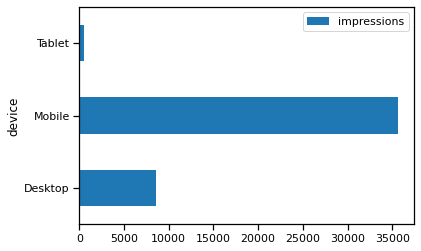

In [516]:
hod.groupby(['device'])['impressions'].sum().plot(kind='barh', ylabel='impressions')
sns.set_context(context='notebook')
plt.legend()

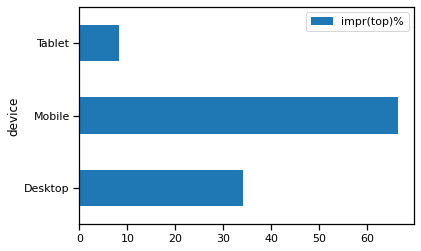

In [517]:
hod.groupby(['device'])['impr(top)%'].mean().plot(kind='barh', ylabel='impr(top)%')
plt.legend()

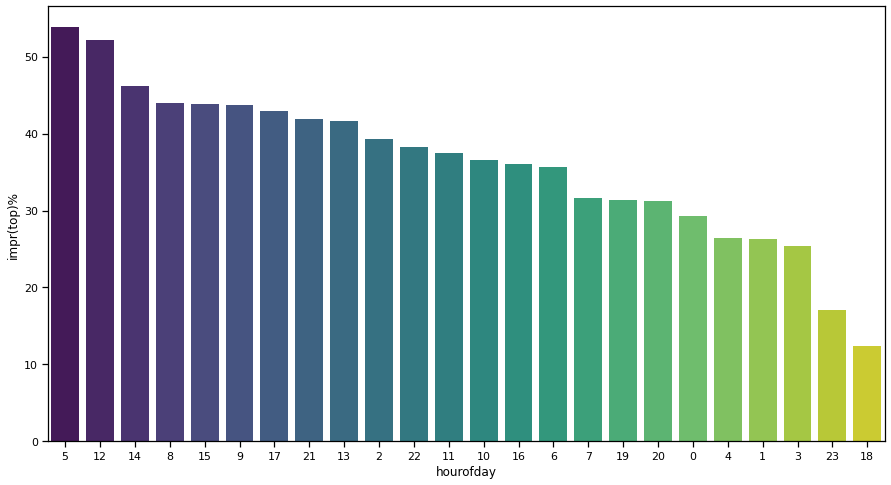

In [518]:
plt.figure(figsize=(15,8))
result = hod.groupby(['hourofday'])['impr(top)%'].mean().reset_index().sort_values('impr(top)%', ascending = False)
result['hourofday'] = result['hourofday'].astype('str')
sns.barplot(x='hourofday', y="impr(top)%", data=result, palette='viridis')



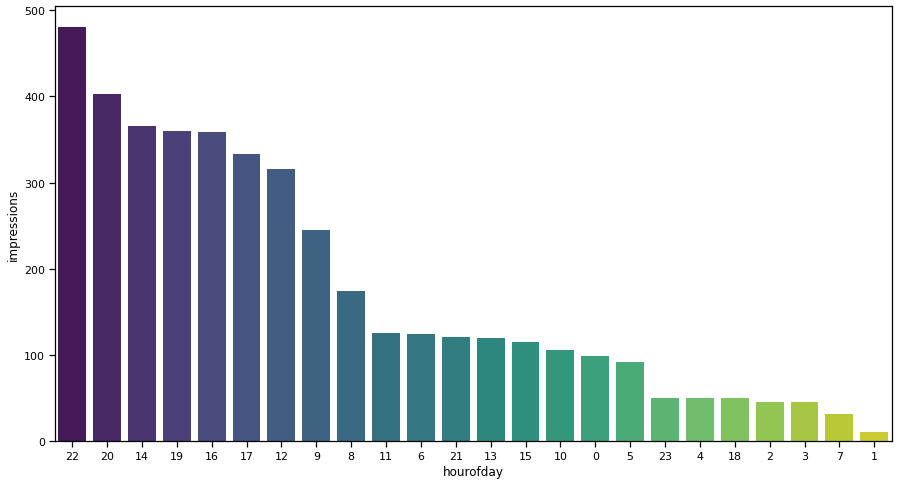

In [519]:
plt.figure(figsize=(15,8))
result2 = hod.groupby(['hourofday'])['impressions'].mean().reset_index().sort_values('impressions', ascending = False)
result2['hourofday'] = result['hourofday'].astype('str')
sns.barplot(x='hourofday', y="impressions", data=result2, palette='viridis')

array([ 0.  ,  6.9 , 34.29, 20.  , 13.04, 12.5 , 17.65,  2.78, 18.75,
       10.  ,  5.26,  8.7 ,  7.41, 13.33, 25.  , 40.  ,  6.25,  7.14,
        8.33,  4.55,  7.78, 15.29, 11.11, 33.33,  5.88, 32.  ])

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


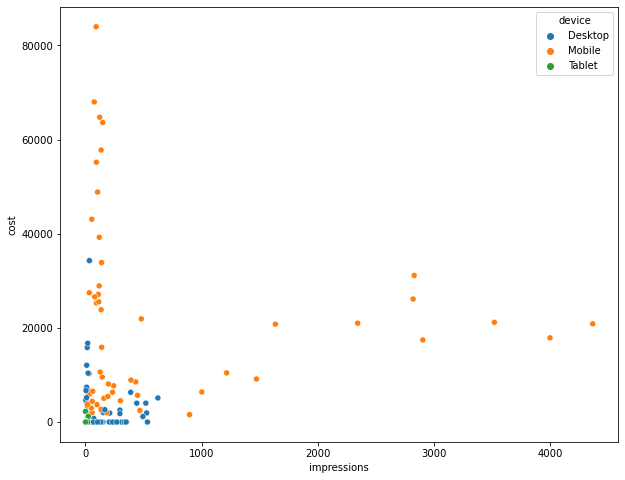

In [157]:
plt.figure(figsize=(10,8))
sns.scatterplot('impressions','cost', data=hod, hue='device')

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


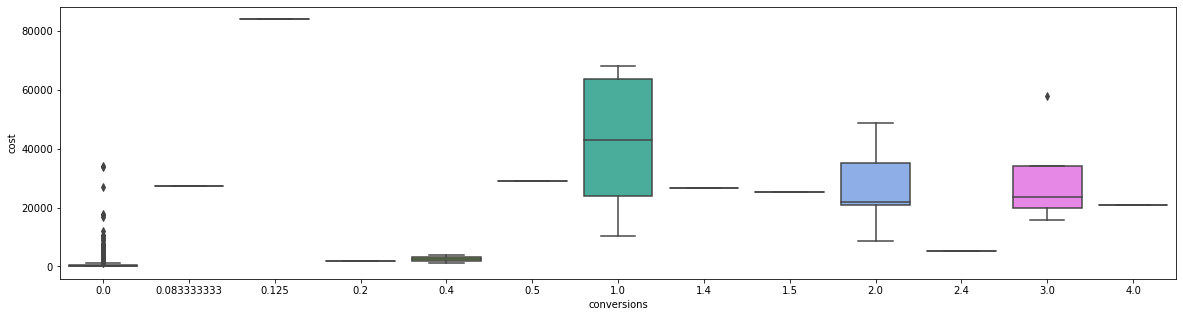

In [162]:
plt.figure(figsize=(20,5))
sns.boxplot('conversions','cost', data=hod)

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; y

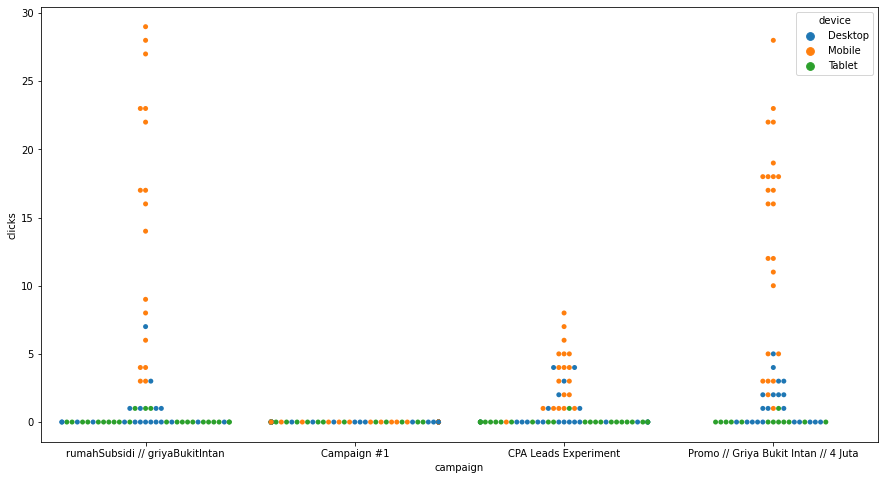

In [176]:
plt.figure(figsize=(15,8))
sns.swarmplot('campaign','clicks', data=hod,hue='device')

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


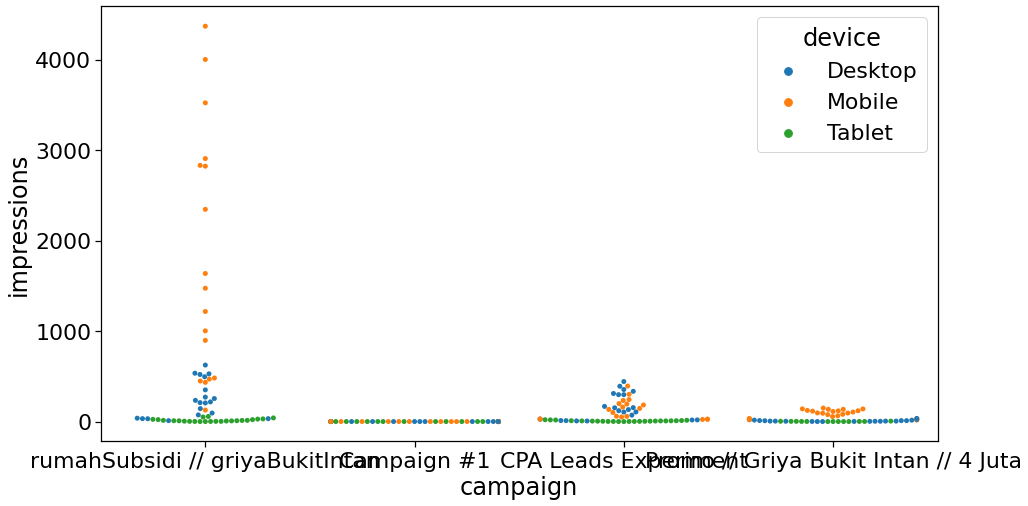

In [303]:
plt.figure(figsize=(15,8))
sns.swarmplot('campaign','impressions', data=hod,hue='device')

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 52.3% of the points cannot be placed; 

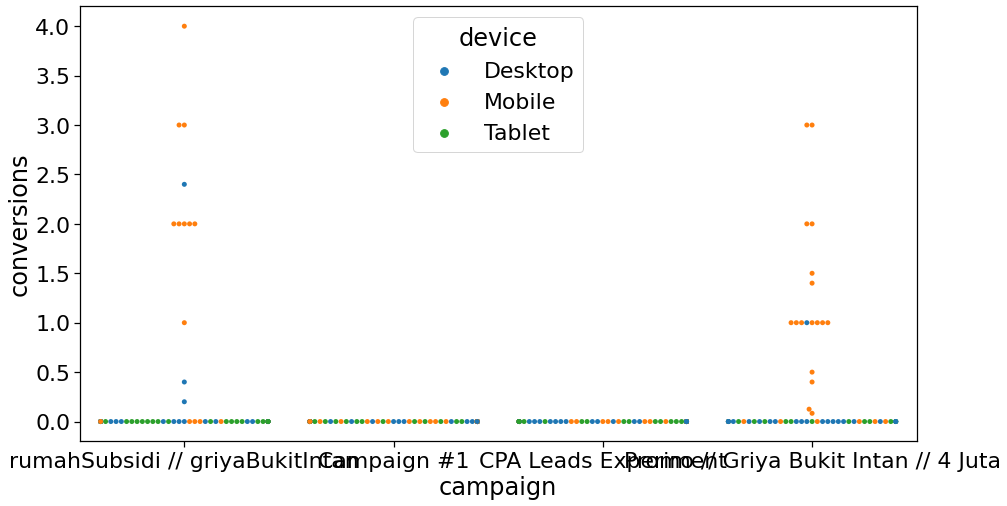

In [304]:
plt.figure(figsize=(15,8))
sns.swarmplot('campaign','conversions', data=hod,hue='device')

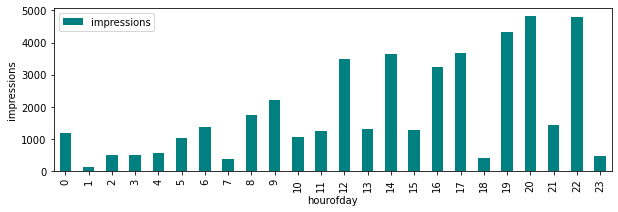

In [150]:
plt.figure(figsize=(10,3))
hod.groupby(['hourofday'])['impressions'].sum().plot(kind='bar', ylabel='impressions', color='teal')
plt.legend()

In [129]:
pd.crosstab(hod['device'],hod['hourofday'],margins=True, margins_name="Total")
 

hourofday,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Total
device,,,,,,,,,,,,,,,,,,,,,,,,,
Desktop,4,4,4,4,3,4,3,4,3,3,4,4,4,4,3,4,2,4,3,4,4,4,3,4,87
Mobile,4,3,4,3,4,4,4,4,4,4,3,3,4,3,4,3,3,4,2,4,4,4,3,2,84
Tablet,4,4,3,4,4,3,4,4,3,2,3,3,3,4,3,4,4,3,3,4,4,4,4,3,84
Total,12,11,11,11,11,11,11,12,10,9,10,10,11,11,10,11,9,11,8,12,12,12,10,9,255


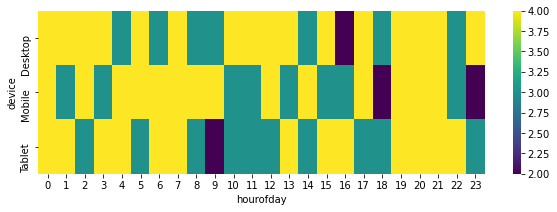

In [126]:
plt.figure(figsize=(10,3))
sns.heatmap(pd.crosstab(hod['device'],hod['hourofday']), cmap='viridis')

> ## Unsupervised (Clustering)

In [178]:
hod.head()

,campaign,hourofday,campaigntype,campaignsubtype,device,currency,impr(top)%,clicks,impressions,ctr,avgcpc,cost,conversions,view-throughconv,cost/conv,convrate
0,rumahSubsidi // griyaBukitIntan,1,Search,All features,Desktop,IDR,0.0,0,37,0.00,0.00,0.00,0.0,0,0.00,0.0
1,rumahSubsidi // griyaBukitIntan,16,Search,All features,Mobile,IDR,100.0,29,2831,1.02,1073.89,31142.69,2.0,0,15571.35,6.9
2,rumahSubsidi // griyaBukitIntan,20,Search,All features,Desktop,IDR,0.0,0,217,0.00,0.00,0.00,0.0,0,0.00,0.0
3,rumahSubsidi // griyaBukitIntan,15,Search,All features,Desktop,IDR,60.0,0,534,0.00,0.00,0.00,0.0,0,0.00,0.0
4,rumahSubsidi // griyaBukitIntan,8,Search,All features,Mobile,IDR,100.0,9,1473,0.61,1016.65,9149.82,0.0,0,0.00,0.0


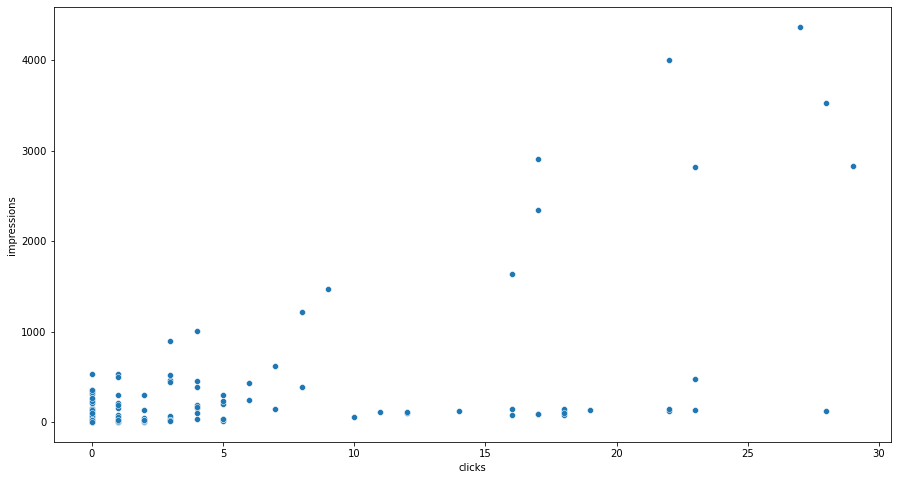

In [185]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='clicks', y='impressions', data=hod)

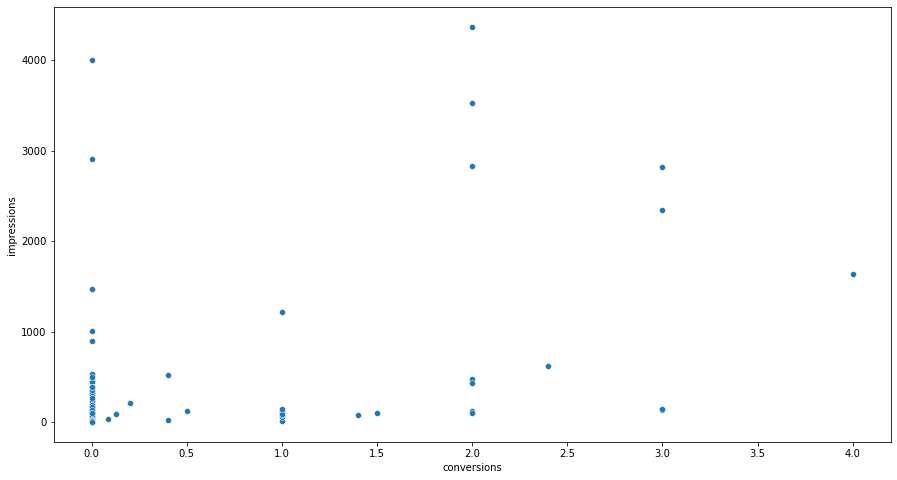

In [183]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='conversions', y='impressions', data=hod)

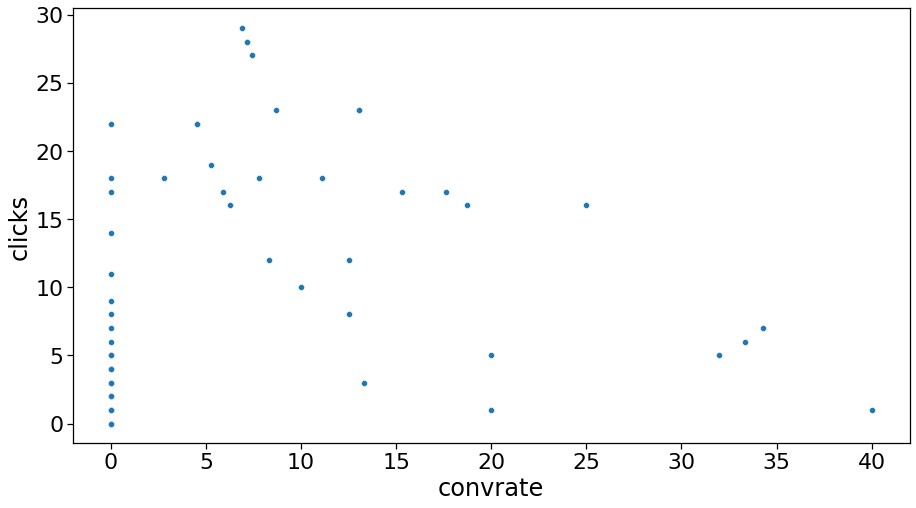

In [301]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='convrate', y='clicks', data=hod)

## Clustering for Cost & Impressions
> ## Agglomerative Clustering

In [242]:
X = hod[['cost','impressions']]
X

,cost,impressions
0,0.00,37
1,31142.69,2831
2,0.00,217
3,0.00,534
4,9149.82,1473
...,...,...
270,0.00,20
271,6315.84,390
272,0.00,17
273,12060.00,11


In [243]:
df = X

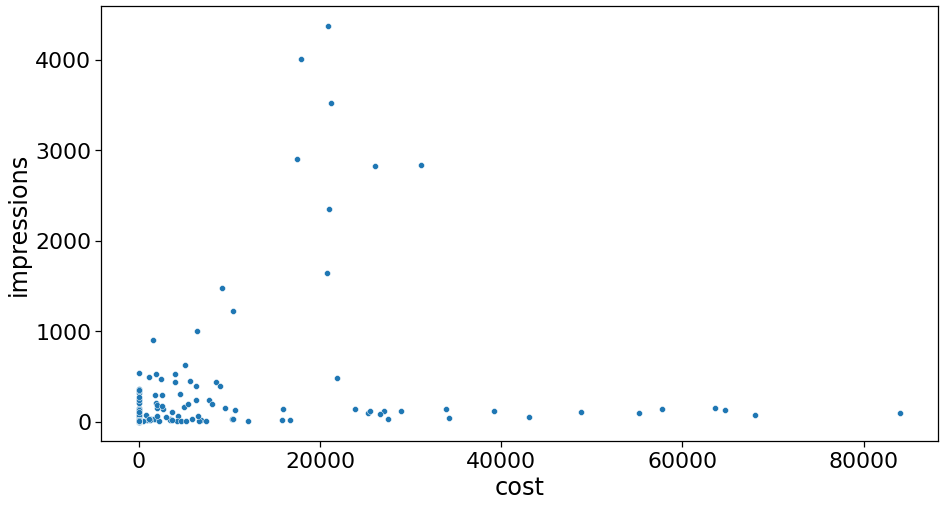

In [244]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='cost', y='impressions', data=X)

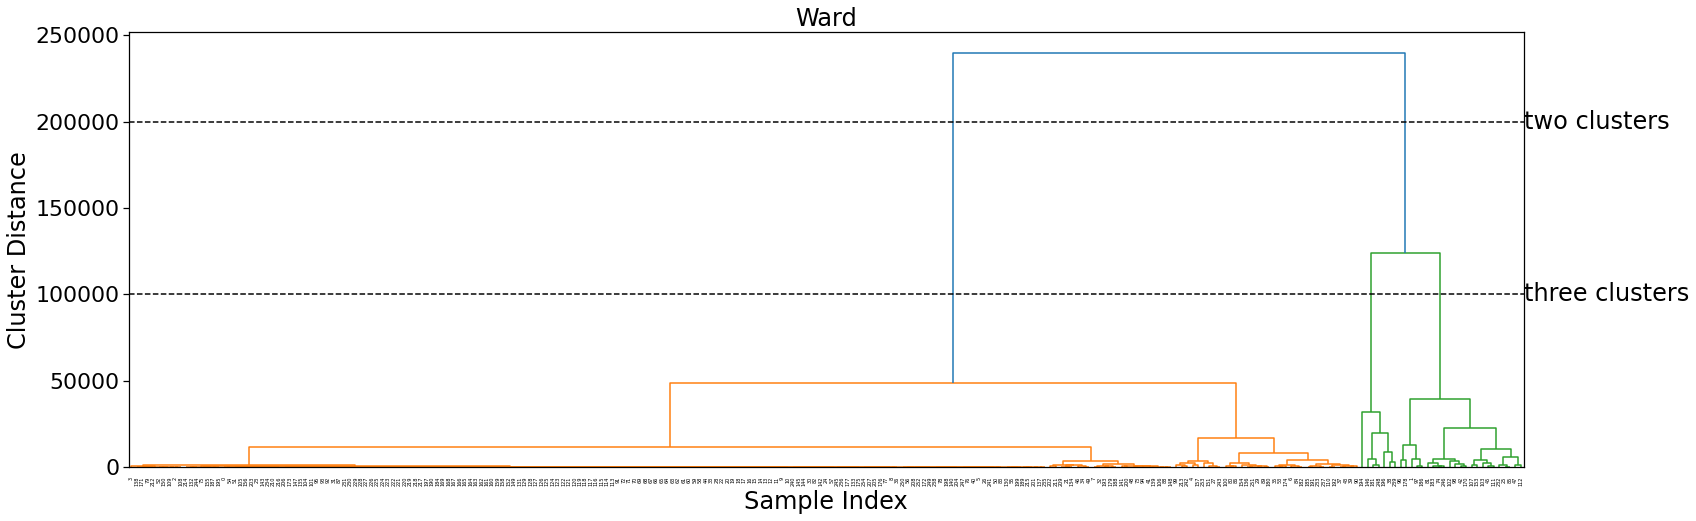

In [245]:
linkage_array = ward(X)

plt.figure(figsize=(25,8))
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [200000,200000], '--', c='k')
ax.plot(bounds, [100000,100000], '--', c='k')
ax.text(bounds[1], 200000, 'two clusters', va='center')
ax.text(bounds[1], 100000, 'three clusters', va='center')
plt.title('Ward')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')

plt.show()

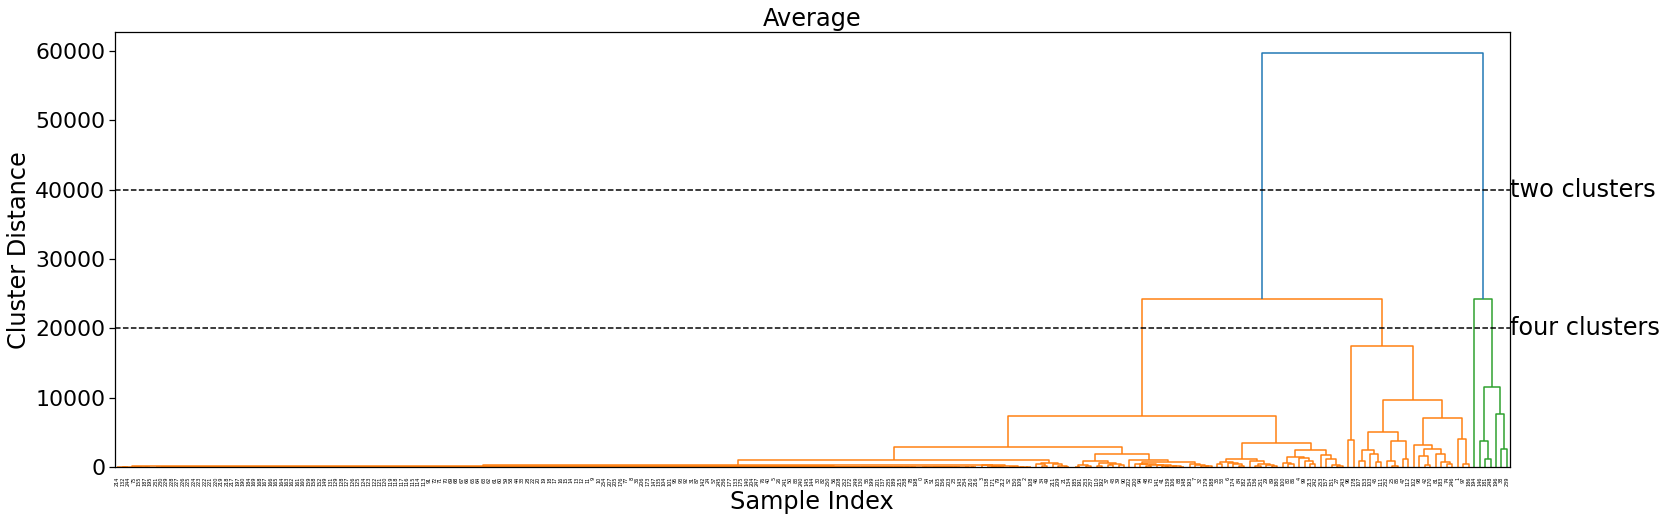

In [246]:
linkage_array = average(X)

plt.figure(figsize=(25,8))
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [40000,40000], '--', c='k')
ax.plot(bounds, [20000,20000], '--', c='k')
ax.text(bounds[1], 40000, 'two clusters', va='center')
ax.text(bounds[1], 20000, 'four clusters', va='center')
plt.title('Average')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')

plt.show()

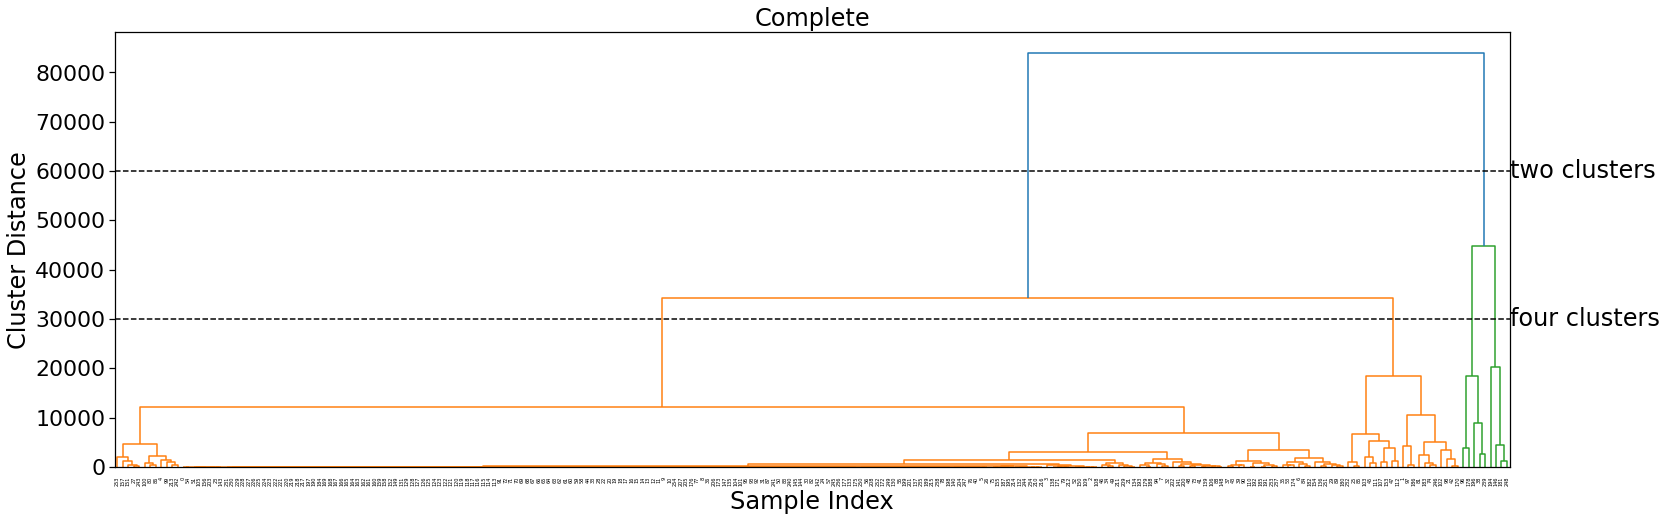

In [247]:
linkage_array = complete(X)

plt.figure(figsize=(25,8))
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [60000,60000], '--', c='k')
ax.plot(bounds, [30000,30000], '--', c='k')
ax.text(bounds[1], 60000, 'two clusters', va='center')
ax.text(bounds[1], 30000, 'four clusters', va='center')
plt.title('Complete')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')

plt.show()

> ## Result Comparison

In [248]:
agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['ward'] = agg_ward.fit_predict(X)

agg_average = AgglomerativeClustering(n_clusters=4, linkage='average')
df['average'] = agg_average.fit_predict(X)

agg_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
df['complete'] = agg_complete.fit_predict(X)

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [249]:
df

,cost,impressions,ward,average,complete
0,0.00,37,0,3,3
1,31142.69,2831,1,0,1
2,0.00,217,0,3,3
3,0.00,534,0,3,3
4,9149.82,1473,0,3,3
...,...,...,...,...,...
270,0.00,20,0,3,3
271,6315.84,390,0,3,3
272,0.00,17,0,3,3
273,12060.00,11,0,3,3


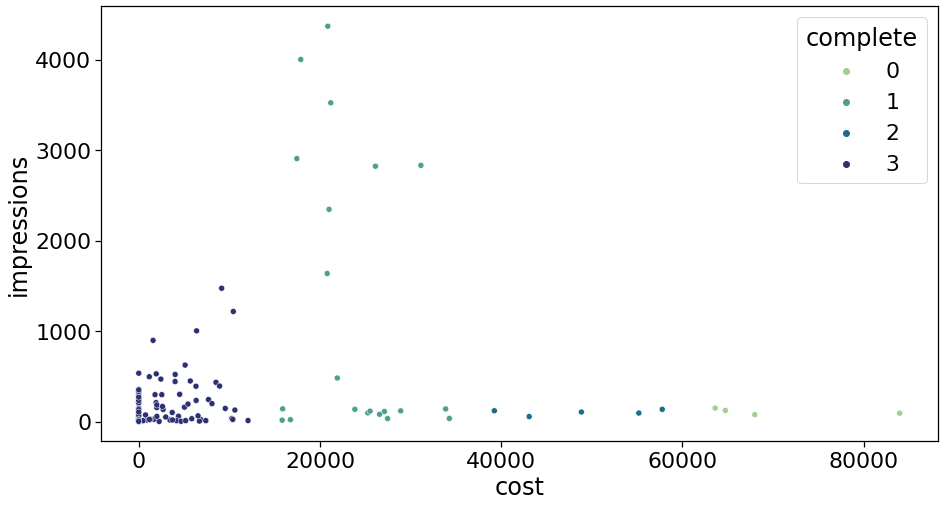

In [250]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='cost', y='impressions', hue='complete', data=df, palette='crest')

> ## Using K-Means

In [294]:
XX = X[['cost','impressions']].values

# ato bisa juga pakai to_numpy()

<Figure size 1080x576 with 0 Axes>

In [288]:
XX[:5]

array([[    0.  ,    37.  ],
       [31142.69,  2831.  ],
       [    0.  ,   217.  ],
       [    0.  ,   534.  ],
       [ 9149.82,  1473.  ]])

In [289]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(XX)

KMeans(n_clusters=3)

In [290]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


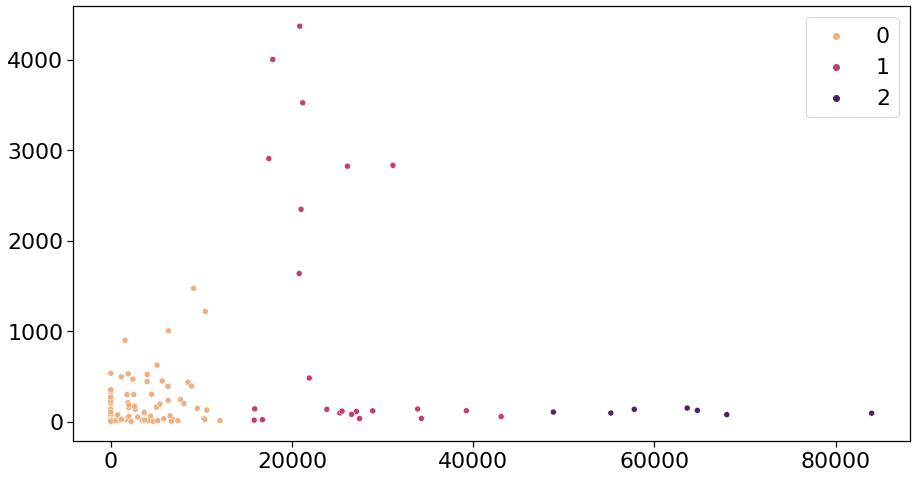

In [300]:
plt.figure(figsize=(15,8))
sns.scatterplot(XX[:,0], XX[:,1], hue=kmeans.labels_, palette='flare')

> ## Predicition using DecisionTreeRegressor and RandomForestRegressor

In [412]:
# X = hod[['hourofday', 'device', 'impr(top)%', 'clicks', 'impressions', 'ctr', 'avgcpc','cost', 'conversions', 'cost/conv']]
X = hod[['hourofday', 'device', 'impr(top)%', 'clicks', 'impressions', 'ctr', 'avgcpc',
       'cost', 'conversions']]
y = hod['convrate']

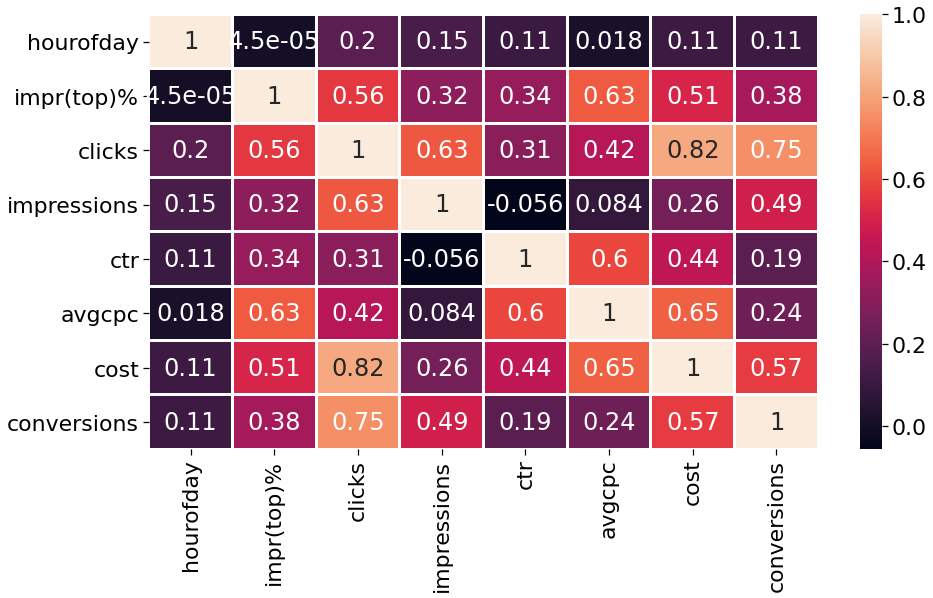

In [413]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(), annot=True, linewidths=2)

In [414]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 274
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hourofday    255 non-null    int64  
 1   device       255 non-null    object 
 2   impr(top)%   255 non-null    float64
 3   clicks       255 non-null    int64  
 4   impressions  255 non-null    int64  
 5   ctr          255 non-null    float64
 6   avgcpc       255 non-null    float64
 7   cost         255 non-null    float64
 8   conversions  255 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 29.9+ KB


In [415]:
hod.columns

Index(['campaign', 'hourofday', 'campaigntype', 'campaignsubtype', 'device',
       'currency', 'impr(top)%', 'clicks', 'impressions', 'ctr', 'avgcpc',
       'cost', 'conversions', 'view-throughconv', 'cost/conv', 'convrate'],
      dtype='object')

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=111)

In [417]:
y.shape

(255,)

In [418]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((204, 9), (51, 9), (204,), (51,))

In [445]:
# Untuk onehot fitur Device
onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

transformer = ColumnTransformer([
    ('onehot', onehot_pipeline, ['device']),
], remainder='passthrough')

# model initializing
rfr = RandomForestRegressor(max_depth=9, random_state=111)
dtr = DecisionTreeRegressor(max_depth=9, random_state=111)
rfe = RFE(estimator=dtr)
xg_b = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 111)

all_in_pipeline = Pipeline([
    ('transformer', transformer),
    ('rfe', rfe),
    ('rgs', dtr)
])

all_in_pipeline_rfr = Pipeline([
    ('transformer', transformer),
    ('rfe', rfe),
    ('rfr', rfr)
])

all_in_pipeline_xgb = Pipeline([
    ('transformer', transformer),
    ('rfe', rfe),
    ('xgb', xg_b)
])

In [420]:
all_in_pipeline.fit(X_train, y_train)
predictions = all_in_pipeline.predict(X_test)

print("r2/variance train : ", all_in_pipeline.score(X_train,y_train))
print("r2/variance test : ", all_in_pipeline.score(X_test,y_test))
print("Residual sum of squares: %.2f"
              % np.mean((all_in_pipeline.predict(X_test) - y_test) ** 2))

r2/variance train :  0.999717865074209
r2/variance test :  0.2390844711069383
Residual sum of squares: 3.09


In [426]:
all_in_pipeline_rfr.fit(X_train, y_train)
predictions = all_in_pipeline_rfr.predict(X_test)

print("r2/variance train : ", all_in_pipeline_rfr.score(X_train,y_train))
print("r2/variance test : ", all_in_pipeline_rfr.score(X_test,y_test))
print("Residual sum of squares: %.2f"
              % np.mean((all_in_pipeline_rfr.predict(X_test) - y_test) ** 2))

r2/variance train :  0.9750122404527235
r2/variance test :  0.6884169390692284
Residual sum of squares: 1.26


In [446]:
all_in_pipeline_xgb.fit(X_train, y_train)
predictions = all_in_pipeline_xgb.predict(X_test)

print("r2/variance train : ", all_in_pipeline_xgb.score(X_train,y_train))
print("r2/variance test : ", all_in_pipeline_xgb.score(X_test,y_test))
print("Residual sum of squares: %.2f"
              % np.mean((all_in_pipeline_xgb.predict(X_test) - y_test) ** 2))

[17:06:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2/variance train :  0.9894194403390292
r2/variance test :  0.6149375835091879
Residual sum of squares: 1.56


In [ ]:
all_in_pipeline.get_params()

In [436]:
all_in_pipeline_rfr.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(drop='first'))]),
                                    ['device'])])),
  ('rfe', RFE(estimator=DecisionTreeRegressor(max_depth=7, random_state=111))),
  ('rfr', RandomForestRegressor(max_depth=9, random_state=111))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot',
                                  Pipeline(steps=[('onehot',
                                                   OneHotEncoder(drop='first'))]),
                                  ['device'])]),
 'rfe': RFE(estimator=DecisionTreeRegressor(max_depth=7, random_state=111)),
 'rfr': RandomForestRegressor(max_depth=9, random_state=111),
 'transformer__n_jobs': None,
 'transformer__remainder': 'passth

In [450]:
# all_in_pipeline_xgb.get_params()

In [451]:
hyperparam_space = {
    'rgs__max_depth': [7,8,9,10,11],
    'rgs__min_samples_split': [6,7,8,9],
    'rgs__criterion': ['mse', 'mae', 'poisson'],
    'rfe__n_features_to_select': [None,5,6,7,8]
}

gridsearch = GridSearchCV(all_in_pipeline, hyperparam_space, verbose=1, n_jobs=4)
gridsearch.fit(X_train, y_train)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 288 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    5.3s finished


GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['device'])])),
                                       ('rfe',
                                        RFE(estimator=DecisionTreeRegressor(max_depth=9,
                                                                            random_state=111))),
                                       ('rgs',
                                        DecisionTreeRegressor(max_depth=9,
                                                              random_state=111))]),
             n_jobs=4,
      

In [455]:
hyperparam_space = {
    'xgb__max_depth': [7,8,9,10,11],
    'xgb__estimators': [50,100,1000],
    'rfe__n_features_to_select': [None,5,6,7,8]
}

gridsearch_xgb = GridSearchCV(all_in_pipeline_xgb, hyperparam_space, verbose=1, n_jobs=3)
gridsearch_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 250 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done 375 out of 375 | elapsed:    2.5s finished


[17:14:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['device'])])),
                                       ('rfe',
                                        RFE(estimator=DecisionTreeRegressor(max_depth=9,
                                                                            random_state=111))),
                                       ('xgb',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                

In [ ]:
hyperparam_space = {
    'rgs__max_depth': [7,8,9,10,11],
    'rgs__min_samples_split': [6,7,8],
    'rgs__criterion': ['mse', 'mae', 'poisson'],
    'rfe__n_features_to_select': [None,5,6,7,8]
}

gridsearch_xgb = GridSearchCV(all_in_pipeline_xgb, hyperparam_space, verbose=1, n_jobs=4)
gridsearch_xgb.fit(X_train, y_train)

In [433]:
res_dtr = pd.DataFrame(gridsearch.cv_results_)
res_dtr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfe__n_features_to_select,param_rgs__criterion,param_rgs__max_depth,param_rgs__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011598,0.000082,0.002865,0.000069,None,mse,7,6,"{'rfe__n_features_to_select': None, 'rgs__crit...",0.886586,0.939069,0.715432,0.848142,-2.295075,0.218831,1.259127,51
1,0.012970,0.000872,0.003189,0.000343,None,mse,7,7,"{'rfe__n_features_to_select': None, 'rgs__crit...",0.884346,0.890654,0.441542,0.853202,-2.295075,0.154934,1.236575,106
2,0.012077,0.002063,0.003333,0.000510,None,mse,7,8,"{'rfe__n_features_to_select': None, 'rgs__crit...",0.884346,0.890654,0.482227,0.856056,-0.489610,0.524735,0.529848,1
3,0.010405,0.000656,0.003292,0.000319,None,mse,8,6,"{'rfe__n_features_to_select': None, 'rgs__crit...",0.886586,0.939069,0.715432,0.848142,-2.295075,0.218831,1.259127,51
4,0.011363,0.000514,0.003243,0.000464,None,mse,8,7,"{'rfe__n_features_to_select': None, 'rgs__crit...",0.884346,0.890654,0.441542,0.853202,-2.295075,0.154934,1.236575,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.007959,0.001186,0.000000,0.000000,8,poisson,10,7,"{'rfe__n_features_to_select': 8, 'rgs__criteri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
221,0.008092,0.001182,0.000000,0.000000,8,poisson,10,8,"{'rfe__n_features_to_select': 8, 'rgs__criteri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,161
222,0.007065,0.000577,0.000000,0.000000,8,poisson,11,6,"{'rfe__n_features_to_select': 8, 'rgs__criteri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,162
223,0.007171,0.001088,0.000000,0.000000,8,poisson,11,7,"{'rfe__n_features_to_select': 8, 'rgs__criteri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,187


In [452]:
model_tuned = gridsearch.best_estimator_.fit(X_train, y_train)
model_tuned.predict(X_test)

print("r2/variance train : ", model_tuned.score(X_train,y_train))
print("r2/variance test : ", model_tuned.score(X_test,y_test))
print("Residual sum of squares: %.2f"
              % np.mean((model_tuned.predict(X_test) - y_test) ** 2))

r2/variance train :  0.9147334523884709
r2/variance test :  0.07905881425160055
Residual sum of squares: 3.74


In [453]:
model_tuned_rfr = gridsearch_rfr.best_estimator_.fit(X_train, y_train)
model_tuned_rfr.predict(X_test)

print("r2/variance train : ", model_tuned_rfr.score(X_train,y_train))
print("r2/variance test : ", model_tuned_rfr.score(X_test,y_test))
print("Residual sum of squares: %.2f"
              % np.mean((model_tuned_rfr.predict(X_test) - y_test) ** 2))

r2/variance train :  0.9377828768534594
r2/variance test :  0.6490616193047795
Residual sum of squares: 1.42


In [456]:
model_tuned_xgb = gridsearch_xgb.best_estimator_.fit(X_train, y_train)
model_tuned_xgb.predict(X_test)

print("r2/variance train : ", model_tuned_xgb.score(X_train,y_train))
print("r2/variance test : ", model_tuned_xgb.score(X_test,y_test))
print("Residual sum of squares: %.2f"
              % np.mean((model_tuned_xgb.predict(X_test) - y_test) ** 2))

[17:14:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
r2/variance train :  0.9905073827532397
r2/variance test :  0.7480875370133506
Residual sum of squares: 1.02


In [457]:
gridsearch_xgb.best_score_

0.4940603699859315

In [460]:
gridsearch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['device'])])),
                ('rfe',
                 RFE(estimator=DecisionTreeRegressor(max_depth=9,
                                                     random_state=111))),
                ('rgs',
                 DecisionTreeRegressor(max_depth=7, min_samples_split=9,
                                       random_state=111))])

In [461]:
gridsearch.best_index_

3

In [462]:
X_train.head()

,hourofday,device,impr(top)%,clicks,impressions,ctr,avgcpc,cost,conversions
138,23,Desktop,0.0,0,106,0.00,0.00,0.00,0.0
6,11,Desktop,62.5,7,624,1.12,730.98,5116.89,2.4
45,22,Tablet,0.0,0,0,0.00,0.00,0.00,0.0
3,15,Desktop,60.0,0,534,0.00,0.00,0.00,0.0
54,22,Desktop,0.0,0,254,0.00,0.00,0.00,0.0


In [467]:
add1 = [[11, 'Desktop', 60, 5, 100, 0, 0, 3000, 1]]
model_tuned.predict(pd.DataFrame(add1, columns=X_train.columns))

array([27.56428571])

In [479]:
add2 = [[1, 'Mobile', 60, 5, 0, 0, 0, 0, 0]]
model_tuned.predict(pd.DataFrame(add2, columns=X_train.columns))

array([0.])